In [1]:
# Standard scientific Python imports
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold

# scikit-learn k-fold cross-validation
from numpy import array

In [2]:
input_data = pd.read_csv("/Users/SailahariMullapudi/Desktop/PanPred-master/test_data/curated_input_GY.csv")
input_data.head()

,Unnamed: 0,AMX,Year,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
0,11657_5#10,NaN,2010.0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,11657_5#11,NaN,2010.0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,11657_5#12,NaN,2010.0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,11657_5#13,NaN,2010.0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,11657_5#14,NaN,2010.0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
input_data2 = input_data.rename(columns={"Unnamed: 0": "Isolate"})

In [4]:
input_data = input_data.dropna()
y = input_data['AMX']
del input_data['Unnamed: 0']
del input_data['AMX']
del input_data['Year']
x = np.array(input_data)
print(x)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [5]:
# input_data.head()

In [6]:
X = x
kf = KFold(n_splits=5,shuffle = True)
for train, test in kf.split(X):
    print("%s %s" % (train, test))
    
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

[   0    1    2    3    4    6    7    8   10   11   12   13   16   17
   18   19   20   21   22   23   24   25   27   29   30   31   32   33
   34   35   36   39   40   41   43   44   46   47   48   49   52   53
   55   57   58   59   60   61   63   64   65   66   67   71   73   74
   75   77   78   79   80   82   84   85   86   87   88   89   90   91
   94   95   96   97  101  103  104  105  106  107  108  109  110  111
  113  114  116  117  118  119  120  123  124  125  126  127  128  129
  130  131  132  133  134  135  137  138  140  141  144  145  146  147
  148  149  150  153  154  155  156  157  158  159  160  161  162  163
  164  166  167  168  170  171  173  174  175  176  177  179  181  182
  183  184  185  187  188  189  190  192  194  197  198  199  200  201
  202  203  206  208  209  210  213  214  215  216  217  218  219  220
  221  222  223  224  227  228  230  231  232  233  234  235  236  238
  239  240  241  242  244  245  246  249  250  251  252  253  256  257
  258 

In [7]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[   0    1    2    3    4    5    6    7    8   10   12   14   15   16
   17   18   21   22   23   25   26   27   29   30   31   32   33   35
   36   37   38   40   43   44   45   46   47   48   49   50   51   52
   53   54   55   56   57   58   60   61   63   64   65   67   68   69
   70   71   72   73   74   75   77   80   81   83   84   85   86   88
   89   90   91   93   96   97   98   99  100  101  103  104  105  107
  108  109  110  111  114  117  118  119  120  121  122  123  126  129
  130  131  132  133  134  136  140  141  144  145  146  147  149  150
  151  152  153  154  155  156  157  158  159  161  162  163  165  167
  168  169  171  172  173  174  175  176  177  179  180  183  184  188
  189  190  192  194  195  196  197  198  200  202  203  204  205  206
  207  208  209  210  211  213  214  215  216  217  218  219  221  222
  223  224  225  226  227  228  230  231  232  233  234  235  236  237
  240  241  242  243  244  245  246  248  249  250  25

In [8]:
predicted

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.])

In [9]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        88
         1.0       0.80      0.80      0.80       131

    accuracy                           0.76       219
   macro avg       0.75      0.75      0.75       219
weighted avg       0.76      0.76      0.76       219




Confusion matrix:
[[ 62  26]
 [ 26 105]]


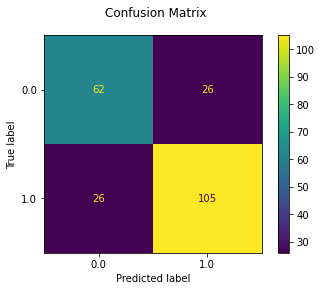

In [10]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [11]:
output_data = pd.read_csv("/Users/SailahariMullapudi/Desktop/PanPred-master/test_data/Metadata.csv")
output_data

,Isolate,Year,CTZ,CTX,AMP,AMX,AMC,TZP,CXM,CET,GEN,TBM,TMP,CIP
0,11657_5#10,2010.0,S,S,S,NaN,S,S,S,S,S,S,S,S
1,11657_5#11,2010.0,S,S,R,NaN,R,S,S,S,S,S,R,R
2,11657_5#12,2010.0,S,S,S,NaN,S,S,S,S,S,S,S,S
3,11657_5#13,2010.0,S,S,R,NaN,R,S,S,S,S,S,S,R
4,11657_5#14,2010.0,S,S,R,NaN,S,S,S,S,S,S,R,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,24742_1#96,NaN,S,S,S,NaN,NaN,NaN,S,S,S,S,S,S
1932,24742_1#97,NaN,S,S,S,NaN,NaN,NaN,S,S,S,R,S,S
1933,24742_1#98,NaN,S,S,R,NaN,NaN,NaN,S,S,S,S,S,S
1934,24742_1#99,NaN,S,S,R,NaN,NaN,NaN,S,S,S,S,S,S


In [12]:
input_all = input_data2.merge(output_data, on='Isolate', how='left')

In [13]:
input_data.columns

Index(['yeiU', 'yhhS', 'ybaE', 'eutR', 'ibrB', 'ytfP', 'aslB', 'narQ', 'tolR',
       'galM',
       ...
       'group_48768', 'group_48873', 'group_48916', 'group_48933',
       'group_48937', 'group_48958', 'group_49020', 'group_49174',
       'group_49253', 'group_49257'],
      dtype='object', length=17198)

In [14]:
output_data.columns

Index(['Isolate', 'Year', 'CTZ', 'CTX', 'AMP', 'AMX', 'AMC', 'TZP', 'CXM',
       'CET', 'GEN', 'TBM', 'TMP', 'CIP'],
      dtype='object')

In [15]:
input_all

,Isolate,AMX_x,Year_x,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,...,AMP,AMX_y,AMC,TZP,CXM,CET,GEN,TBM,TMP,CIP
0,11657_5#10,NaN,2010.0,1,1,1,1,1,1,1,...,S,NaN,S,S,S,S,S,S,S,S
1,11657_5#11,NaN,2010.0,1,1,1,1,1,1,1,...,R,NaN,R,S,S,S,S,S,R,R
2,11657_5#12,NaN,2010.0,1,1,1,1,1,1,1,...,S,NaN,S,S,S,S,S,S,S,S
3,11657_5#13,NaN,2010.0,1,1,1,1,1,1,1,...,R,NaN,R,S,S,S,S,S,S,R
4,11657_5#14,NaN,2010.0,1,1,1,1,1,1,1,...,R,NaN,S,S,S,S,S,S,R,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,24742_1#96,NaN,NaN,1,1,1,1,1,1,1,...,S,NaN,NaN,NaN,S,S,S,S,S,S
1932,24742_1#97,NaN,NaN,1,1,1,1,1,1,1,...,S,NaN,NaN,NaN,S,S,S,R,S,S
1933,24742_1#98,NaN,NaN,1,1,1,1,1,1,1,...,R,NaN,NaN,NaN,S,S,S,S,S,S
1934,24742_1#99,NaN,NaN,1,1,1,1,1,1,1,...,R,NaN,NaN,NaN,S,S,S,S,S,S


In [16]:
input_all['AMX_x'].isna().sum()

842

In [17]:
input_all.isna().sum()
del input_all['AMP']
del input_all['CET']
del input_all['TBM']
del input_all['TMP']

In [18]:
input_allna = input_all.dropna()
y = input_allna['CTZ']
del input_allna['CTX']
del input_allna['AMC']
del input_allna['TZP']
del input_allna['CXM']
del input_allna['GEN']
del input_allna['CIP']
del input_allna['AMX_x']
del input_allna['AMX_y']
del input_allna['Isolate']
del input_allna['CTZ']
del input_allna['Year_x']
del input_allna['Year_y']
x = np.array(input_allna)
print(x)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [19]:
input_allna

,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,narQ,tolR,galM,...,group_48768,group_48873,group_48916,group_48933,group_48937,group_48958,group_49020,group_49174,group_49253,group_49257
23,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
24,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
25,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
26,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
27,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1505,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1506,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1507,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X = x
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    print("%s %s" % (train, test))
    
clf = svm.SVC(gamma=0.001)

# # Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)
    
# # Learn the digits on the train subset
clf.fit(X_train, y_train)

# # Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

[ 204  205  206  207  208  209  210  211  212  213  214  215  216  217
  218  219  220  221  222  223  224  225  226  227  228  229  230  231
  232  233  234  235  236  237  238  239  240  241  242  243  244  245
  246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  296  297  298  299  300  301
  302  303  304  305  306  307  308  309  310  311  312  313  314  315
  316  317  318  319  320  321  322  323  324  325  326  327  328  329
  330  331  332  333  334  335  336  337  338  339  340  341  342  343
  344  345  346  347  348  349  350  351  352  353  354  355  356  357
  358  359  360  361  362  363  364  365  366  367  368  369  370  371
  372  373  374  375  376  377  378  379  380  381  382  383  384  385
  386  387  388  389  390  391  392  393  394  395  396  397  398  399
  400 

In [21]:
predicted

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S

In [22]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           R       0.00      0.00      0.00        15
           S       0.93      1.00      0.96       189

    accuracy                           0.93       204
   macro avg       0.46      0.50      0.48       204
weighted avg       0.86      0.93      0.89       204




/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Confusion matrix:
[[  0  15]
 [  0 189]]


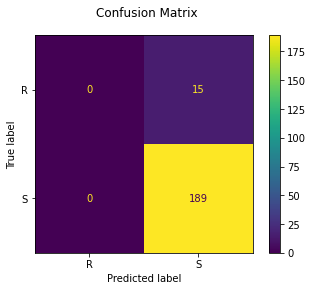

In [23]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [24]:
input_allna2 = input_all.dropna()

y = input_allna2['AMC']

del input_allna2['CTX']
del input_allna2['AMC']
del input_allna2['TZP']
del input_allna2['CXM']
del input_allna2['GEN']
del input_allna2['CIP']
del input_allna2['AMX_x']
del input_allna2['AMX_y']
del input_allna2['Isolate']
del input_allna2['CTZ']
del input_allna2['Year_x']
del input_allna2['Year_y']
x = np.array(input_allna2)
print(x)

X = x
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    print("%s %s" % (train, test))
    
clf = svm.SVC(gamma=0.001)

# # Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)
    
# # Learn the digits on the train subset
clf.fit(X_train, y_train)

# # Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
predicted

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
[ 204  205  206  207  208  209  210  211  212  213  214  215  216  217
  218  219  220  221  222  223  224  225  226  227  228  229  230  231
  232  233  234  235  236  237  238  239  240  241  242  243  244  245
  246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  296  297  298  299  300  301
  302  303  304  305  306  307  308  309  310  311  312  313  314  315
  316  317  318  319  320  321  322  323  324  325  326  327  328  329
  330  331  332  333  334  335  336  337  338  339  340  341  342  343
  344  345  346  347  348  349  350  351  352  353  354  355  356  357
  358  359  360  361  362  363  364  365  366  367  368  369  370  371
  372  373  374  375  376  3

array(['S', 'S', 'S', 'S', 'R', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'R', 'S', 'S', 'S', 'S', 'S', 'R', 'S', 'R', 'S', 'S', 'S', 'R',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'R', 'R', 'S', 'S', 'S', 'R',
       'R', 'R', 'S', 'S', 'R', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'R',
       'S', 'S', 'S', 'S', 'R', 'S', 'R', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'R', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'R', 'S', 'S', 'R', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'R', 'S', 'R', 'S', 'S', 'S', 'S', 'R',
       'S', 'S', 'S', 'S', 'S', 'S', 'R', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'R', 'S', 'S', 'S', 'S', 'R',
       'S', 'R', 'R', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'R', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'R', 'S', 'S', 'S', 'S', 'S', 'R', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           R       0.77      0.38      0.51        64
           S       0.77      0.95      0.85       140

    accuracy                           0.77       204
   macro avg       0.77      0.66      0.68       204
weighted avg       0.77      0.77      0.74       204


Confusion matrix:
[[ 24  40]
 [  7 133]]


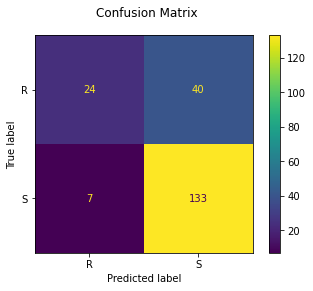

In [25]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [26]:
input_allna3 = input_all.dropna()

y = input_allna3['TZP']

del input_allna3['CTX']
del input_allna3['AMC']
del input_allna3['TZP']
del input_allna3['CXM']
del input_allna3['GEN']
del input_allna3['CIP']
del input_allna3['AMX_x']
del input_allna3['AMX_y']
del input_allna3['Isolate']
del input_allna3['CTZ']
del input_allna3['Year_x']
del input_allna3['Year_y']
x = np.array(input_allna3)
print(x)

X = x
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    print("%s %s" % (train, test))
    
clf = svm.SVC(gamma=0.001)

# # Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)
    
# # Learn the digits on the train subset
clf.fit(X_train, y_train)

# # Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
predicted

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
[ 204  205  206  207  208  209  210  211  212  213  214  215  216  217
  218  219  220  221  222  223  224  225  226  227  228  229  230  231
  232  233  234  235  236  237  238  239  240  241  242  243  244  245
  246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  296  297  298  299  300  301
  302  303  304  305  306  307  308  309  310  311  312  313  314  315
  316  317  318  319  320  321  322  323  324  325  326  327  328  329
  330  331  332  333  334  335  336  337  338  339  340  341  342  343
  344  345  346  347  348  349  350  351  352  353  354  355  356  357
  358  359  360  361  362  363  364  365  366  367  368  369  370  371
  372  373  374  375  376  3

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S

/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           R       0.00      0.00      0.00        16
           S       0.92      1.00      0.96       188

    accuracy                           0.92       204
   macro avg       0.46      0.50      0.48       204
weighted avg       0.85      0.92      0.88       204


Confusion matrix:
[[  0  16]
 [  0 188]]


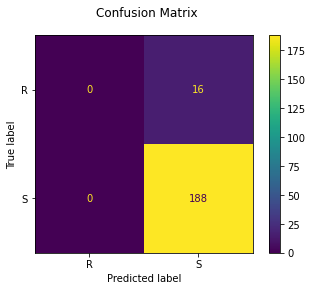

In [27]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [28]:
input_allna4 = input_all.dropna()

y = input_allna4['GEN']

del input_allna4['CTX']
del input_allna4['AMC']
del input_allna4['TZP']
del input_allna4['CXM']
del input_allna4['GEN']
del input_allna4['CIP']
del input_allna4['AMX_x']
del input_allna4['AMX_y']
del input_allna4['Isolate']
del input_allna4['CTZ']
del input_allna4['Year_x']
del input_allna4['Year_y']
x = np.array(input_allna4)
print(x)

X = x
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    print("%s %s" % (train, test))
    
clf = svm.SVC(gamma=0.001)

# # Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)
    
# # Learn the digits on the train subset
clf.fit(X_train, y_train)

# # Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
predicted

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
[ 204  205  206  207  208  209  210  211  212  213  214  215  216  217
  218  219  220  221  222  223  224  225  226  227  228  229  230  231
  232  233  234  235  236  237  238  239  240  241  242  243  244  245
  246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  296  297  298  299  300  301
  302  303  304  305  306  307  308  309  310  311  312  313  314  315
  316  317  318  319  320  321  322  323  324  325  326  327  328  329
  330  331  332  333  334  335  336  337  338  339  340  341  342  343
  344  345  346  347  348  349  350  351  352  353  354  355  356  357
  358  359  360  361  362  363  364  365  366  367  368  369  370  371
  372  373  374  375  376  3

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           R       0.00      0.00      0.00        15
           S       0.93      1.00      0.96       189

    accuracy                           0.93       204
   macro avg       0.46      0.50      0.48       204
weighted avg       0.86      0.93      0.89       204


Confusion matrix:
[[  0  15]
 [  0 189]]


/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

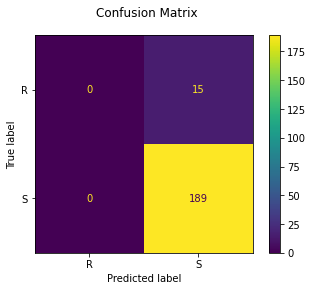

In [29]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()